Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

Then compile the Mesenchymal Condensation Simulation app using make.

In [1]:
%%bash
cd ../chaste_build/
make MesenchymalCondensationSimulation

[  5%] Built target timekeeper
[ 15%] Built target chaste_global
[ 15%] Built target chaste_linalg
[ 21%] Built target chaste_io
[ 26%] Built target chaste_ode
[ 42%] Built target chaste_mesh
[ 47%] Built target chaste_pde
[ 94%] Built target chaste_cell_based
[100%] Built target chaste_project_cartilage
[100%] Built target MesenchymalCondensationSimulation


In [2]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
#plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

Data archive: (first three have default distance between boundaries of 7.0)

- 10 random seeds (0--9), TransitCellG1Duration=50, maxTransitGenerations=2, no post-processing yet
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200316-131659/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200316-134749/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, random division directions
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200316-144234/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --rdd
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 6.0
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-164235/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 6.0
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 6.0, random division directions
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-164817/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 6.0 --rdd
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 5.0
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-171206/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 5.0
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 5.0, random division directions
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-170821/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 5.0 --rdd
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 4.0
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-173457/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 4.0
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 4.0, random division directions
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-172719/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 4.0 --rdd  



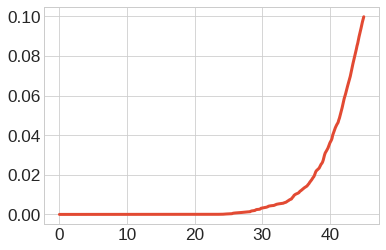

In [3]:
od = 'exp-mesenchymal_condensation/20200316-134749/'
# time steps are consistent across runs, so it's sufficient to load them from a single path
times, coords = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+od + '0/results_from_time_0/') 

ppa_av = np.zeros(times.shape)
for seed in range(10):
    ppa_av = ppa_av + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+od+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av = ppa_av /10

plt.plot(times, ppa_av)

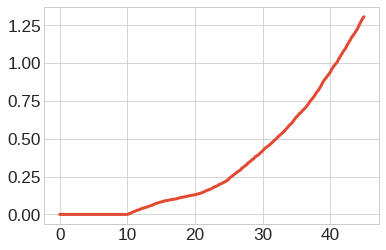

In [7]:
od = 'exp-mesenchymal_condensation/20200316-144234/'
# time steps are consistent across runs, so it's sufficient to load them from a single path
times, coords = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+od + '0/results_from_time_0/') 

ppa_av = np.zeros(times.shape)
for seed in range(10):
    ppa_av = ppa_av + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+od+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av = ppa_av /10

plt.plot(times, ppa_av)

Text(0,0.5,'Average patch projection area')

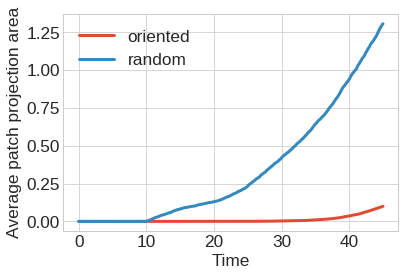

In [8]:
dir_directed = 'exp-mesenchymal_condensation/20200316-134749/'
dir_random = 'exp-mesenchymal_condensation/20200316-144234/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

# Less distance between boundaries

Text(0,0.5,'Average patch projection area')

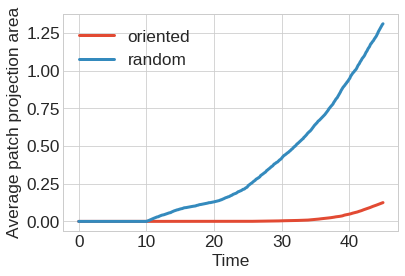

In [10]:
dir_directed = 'exp-mesenchymal_condensation/20200323-164235/'
dir_random = 'exp-mesenchymal_condensation/20200323-164817/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.title('distance 6.0')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

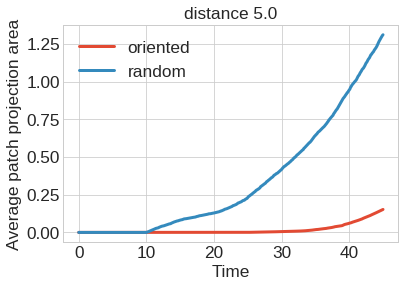

In [26]:
dir_directed = 'exp-mesenchymal_condensation/20200323-171206/'
dir_random = 'exp-mesenchymal_condensation/20200323-170821/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.legend()
plt.title('distance 5.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

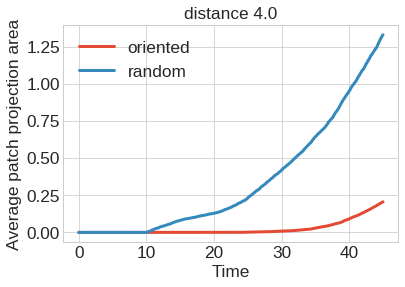

In [32]:
dir_directed = 'exp-mesenchymal_condensation/20200323-173457/'
dir_random = 'exp-mesenchymal_condensation/20200323-172719/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.legend()
plt.title('distance 4.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

In [28]:
output_directory = 'exp-mesenchymal_condensation/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 45.0' # final time 45h
flags = flags + ' --sw 10' # 10 cells in x direction
flags = flags + ' --sd 20' # 20 cells in y direction
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0 -> repulsion only
flags = flags + ' --A 0.5' # 50% of stem cells activated
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 80.0' # set repulsive spring stiffness to 80.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --u 4.0' # set distance between boundaries to 6.0
#flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation'

In [29]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=10, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-173457/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 4.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-173457/ --S 1 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 4.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-173457/ --S 2 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 4.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-173457/ --S 3 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 

In [31]:
de.run_postprocessing_multiple_random_seeds(10, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200323-173457/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200323-173457/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200323-173457/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200323-173457/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200323-173457/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200323-173457/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200323-173457/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200323-173457/7/results_from_time_0/', '/home/kubuntu1804/Documents/sf

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
